# Problem Set 9
## MACS 30150
## Songrun He

### Problem 1

### (a)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/strongdrink.txt', na_values = '?')
print(df.head())
df.describe()

   cultivar   alco  malic   ash   alk  magn  tot_phen  flav  nonfl_phen  \
0         1  14.23   1.71  2.43  15.6   127      2.80  3.06        0.28   
1         1  13.20   1.78  2.14  11.2   100      2.65  2.76        0.26   
2         1  13.16   2.36  2.67  18.6   101      2.80  3.24        0.30   
3         1  14.37   1.95  2.50  16.8   113      3.85  3.49        0.24   
4         1  13.24   2.59  2.87  21.0   118      2.80  2.69        0.39   

   proanth  color_int   hue  OD280rat  proline  
0     2.29       5.64  1.04      3.92     1065  
1     1.28       4.38  1.05      3.40     1050  
2     2.81       5.68  1.03      3.17     1185  
3     2.18       7.80  0.86      3.45     1480  
4     1.82       4.32  1.04      2.93      735  


,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


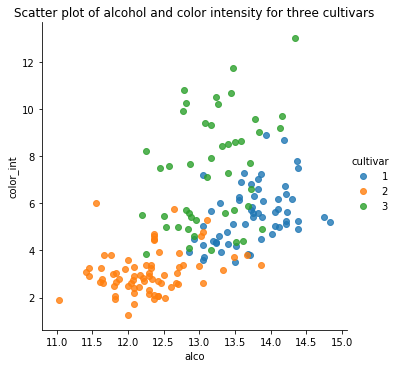

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = 'alco', y = 'color_int', data = df, \
           hue = 'cultivar', legend = 'cultivar', fit_reg = False)
plt.title('Scatter plot of alcohol and color intensity for three cultivars')
plt.show()

### (b)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform
import warnings
warnings.filterwarnings('ignore')

np.random.seed(25)

d = {}

X = df[['alco', 'malic', 'tot_phen', 'color_int']].values
y = df['cultivar'].values

logit = LogisticRegression()

param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(logit, param_distributions = param_dist1,
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

rs_fit1 = random_search1.fit(X, y)
print('The optimal tuning parameter values are: ', rs_fit1.best_params_)
print('The MSE of the optimal result is: ', abs(rs_fit1.best_score_))
d['logit'] = abs(rs_fit1.best_score_)

The optimal tuning parameter values are:  {'C': 2.665871587495725, 'penalty': 'l1'}
The MSE of the optimal result is:  0.11931818181818182


### (c)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
warnings.filterwarnings('ignore')

np.random.seed(25)

random_forest = RandomForestClassifier()

params_dist2 = {'n_estimators': sp_randint(10, 200), 
               'max_depth': sp_randint(2,4),
               'min_samples_split': sp_randint(2,20),
               'min_samples_leaf': sp_randint(2,20),
               'max_features': sp_randint(1,4)}
random_search2 = RandomizedSearchCV(random_forest, param_distributions = params_dist2,
                                   n_iter = 200, cv = 5, n_jobs = -1, random_state = 25,
                                   scoring = 'neg_mean_squared_error')
rs_fit2 = random_search2.fit(X, y)
print('The optimal tuning parameter values are: ', rs_fit2.best_params_)
print('The MSE of the optimal result is: ', abs(rs_fit2.best_score_))
d['random_forest'] = abs(rs_fit2.best_score_)

The optimal tuning parameter values are:  {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 13, 'min_samples_split': 4, 'n_estimators': 41}
The MSE of the optimal result is:  0.11363636363636363


### (d)

In [68]:
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

np.random.seed(25)

svc = SVC(kernel = 'rbf')

param_dist3 = {'C': sp_uniform(loc = 0.1, scale = 10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(svc, param_distributions = param_dist3,
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25,
                                    scoring = 'neg_mean_squared_error')
rs_fit3 = random_search3.fit(X,y)
print('The optimal tuning parameter values are: ', rs_fit3.best_params_)
print('The MSE of the optimal result is: ', abs(rs_fit3.best_score_))
d['SVM'] = abs(rs_fit3.best_score_)

The optimal tuning parameter values are:  {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
The MSE of the optimal result is:  0.13636363636363635


### (e)

In [74]:
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')
mlp = MLPClassifier(solver = 'lbfgs')

param_dist4 = {'hidden_layer_sizes': sp_randint(1,100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
random_search4 = RandomizedSearchCV(mlp, param_distributions = param_dist4,
                                    n_iter = 200, n_jobs = -1, cv = 5, random_state = 25,
                                    scoring = 'neg_mean_squared_error')

rs_fit4 = random_search4.fit(X, y)
print('The optimal tuning parameter values are: ', rs_fit4.best_params_)
print('The MSE of the optimal result is: ', abs(rs_fit4.best_score_))
d['neural_network'] = abs(rs_fit4.best_score_)

The optimal tuning parameter values are:  {'activation': 'relu', 'alpha': 0.3814739739579308, 'hidden_layer_sizes': 42}
The MSE of the optimal result is:  0.07954545454545454


### (f)

In [77]:
mse = pd.DataFrame(list(d.items()), columns = ['Method', 'MSE'])
mse

,Method,MSE
0,logit,0.119318
1,random_forest,0.113636
2,SVM,0.136364
3,neural_network,0.079545


Based on the comparison of MSE above, neural network model is the best predictor of cultivar, because it has the smallest mean squared error.